# Importing of Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time


# Loading the CSV FILE and Describing the data
  head and tail

In [36]:
df = pd.read_csv('/content/Energy Consumption Data.csv')
obiedo = df

# Statistic Functions for Python

In [37]:
stats = df.describe()
print(stats)

               WEEK  DAY OF THE WEEK  MONTH OF THE YEAR  WORKING DAY OR NOT  \
count  60516.000000     60516.000000       60516.000000        60516.000000   
mean      26.819849         3.999256           6.504990            0.673177   
std       15.122016         1.999169           3.460984            0.469056   
min        1.000000         1.000000           1.000000            0.000000   
25%       14.000000         2.000000           3.750000            0.000000   
50%       27.000000         4.000000           6.000000            1.000000   
75%       40.000000         6.000000          10.000000            1.000000   
max       53.000000         7.000000          12.000000            1.000000   

       AVERAGE TEMPERATURE  AVERAGE RAINFALL            AD  
count         51756.000000      51756.000000  60516.000000  
mean             27.565616          6.625481   6829.052749  
std               3.083691         14.129387   1228.375474  
min              16.000000          0.000000

# Converting the data types
adding a error handling function

In [40]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%b-%y %H:%M')
df['AD'] = pd.to_numeric(df['AD'], errors ='coerce')
df['Ave_Temp'] = pd.to_numeric(df['AVERAGE TEMPERATURE'], errors = 'coerce')
df['Ave_Rainfall'] = pd.to_numeric(df['AVERAGE RAINFALL'], errors = 'coerce')

# Remove the Null Values

In [21]:
df = df.dropna()

# Extracting year quarter month and day using lambda

In [41]:
df.loc[:, 'year'] = df['date_time'].apply(lambda x: x.year)
df.loc[:, 'quarter'] = df['date_time'].apply(lambda x: x.quarter)
df.loc[:, 'month'] = df['date_time'].apply(lambda x: x.month)
df.loc[:, 'day'] = df['date_time'].apply(lambda x: x.day)

# Re Arranging the table


In [23]:
df = df.loc[:, ['date_time', 'year', 'quarter', 'month', 'day', 'Ave_Temp', 'Ave_Rainfall', 'AD']]
df.sort_values('date_time', inplace = True, ascending = True)
df = df.reset_index(drop = True)
df

,date_time,year,quarter,month,day,Ave_Temp,Ave_Rainfall,AD
0,2012-01-01 00:00:00,2012,1,1,1,23.0,0.0,4228.71
1,2012-01-01 01:00:00,2012,1,1,1,23.0,0.0,4621.02
2,2012-01-01 02:00:00,2012,1,1,1,22.0,0.0,4264.81
3,2012-01-01 03:00:00,2012,1,1,1,22.0,0.0,3964.79
4,2012-01-01 04:00:00,2012,1,1,1,22.0,0.0,3799.18
...,...,...,...,...,...,...,...,...
51751,2017-12-31 19:00:00,2017,4,12,31,28.0,0.0,6548.89
51752,2017-12-31 20:00:00,2017,4,12,31,25.0,0.0,6207.97
51753,2017-12-31 21:00:00,2017,4,12,31,25.0,0.0,5991.03
51754,2017-12-31 22:00:00,2017,4,12,31,25.0,0.0,5805.79


In [24]:
df.describe()

,date_time,year,quarter,month,day,Ave_Temp,Ave_Rainfall,AD
count,51756,51756.000000,51756.000000,51756.000000,51756.000000,51756.000000,51756.000000,51756.000000
mean,2015-01-02 21:58:00.222582784,2014.506627,2.501720,6.501430,15.705174,27.565616,6.625481,6626.666760
min,2012-01-01 00:00:00,2012.000000,1.000000,1.000000,1.000000,16.000000,0.000000,2907.310000
25%,2013-07-04 05:45:00,2013.000000,1.000000,3.000000,8.000000,25.000000,0.000000,5780.107500
50%,2015-01-06 00:30:00,2015.000000,2.000000,6.000000,16.000000,27.000000,0.000000,6625.225000
75%,2016-06-30 18:15:00,2016.000000,4.000000,10.000000,23.000000,30.000000,5.400000,7404.515000
max,2017-12-31 23:00:00,2017.000000,4.000000,12.000000,31.000000,39.000000,92.000000,10021.770000
std,NaN,1.703876,1.122166,3.463189,8.826857,3.083691,14.129387,1132.305974


In [25]:
df['weekday'] = df.apply(lambda row: row['date_time'].weekday(), axis = 1)
df['weekday'] = (df['weekday'] <5). astype(int)

In [26]:
print(df.shape)
print(df.date_time.min())
print(df.date_time.max())
df


(51756, 9)
2012-01-01 00:00:00
2017-12-31 23:00:00


,date_time,year,quarter,month,day,Ave_Temp,Ave_Rainfall,AD,weekday
0,2012-01-01 00:00:00,2012,1,1,1,23.0,0.0,4228.71,0
1,2012-01-01 01:00:00,2012,1,1,1,23.0,0.0,4621.02,0
2,2012-01-01 02:00:00,2012,1,1,1,22.0,0.0,4264.81,0
3,2012-01-01 03:00:00,2012,1,1,1,22.0,0.0,3964.79,0
4,2012-01-01 04:00:00,2012,1,1,1,22.0,0.0,3799.18,0
...,...,...,...,...,...,...,...,...,...
51751,2017-12-31 19:00:00,2017,4,12,31,28.0,0.0,6548.89,0
51752,2017-12-31 20:00:00,2017,4,12,31,25.0,0.0,6207.97,0
51753,2017-12-31 21:00:00,2017,4,12,31,25.0,0.0,5991.03,0
51754,2017-12-31 22:00:00,2017,4,12,31,25.0,0.0,5805.79,0


In [27]:
from scipy import stats
stat, p = stats.normaltest(df.AD)

print ('Statistics = %.3f , p = %.3f' %(stat, p))
alpha = 0.05

if p > alpha:
  print('Data looks Gaussian')
else:
  print('Data does not Look Gaussian')

Statistics = 875.197 , p = 0.000
Data does not Look Gaussian


Kurtosis: -0.44709329671770837
Skewness: 0.1288084142559397


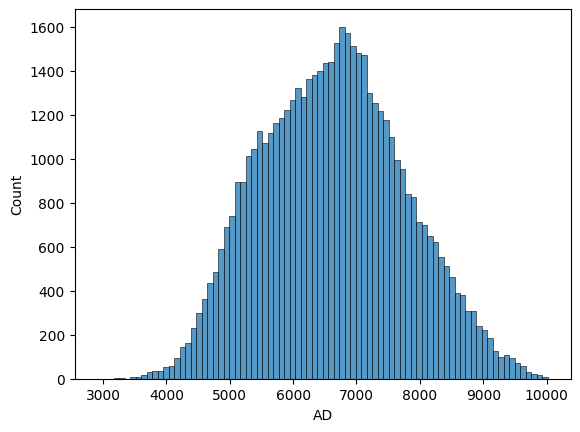

In [28]:
sns.histplot(df.AD)
print('Kurtosis: {}' .format (stats.kurtosis(df.AD)))
print('Skewness: {}' .format (stats.skew(df.AD)))

Interpretation:
Skewness:

Skewness > 0: Data is positively skewed (right skew).
Skewness < 0: Data is negatively skewed (left skew).
Skewness ≈ 0: Data is approximately symmetric.
Kurtosis:

Kurtosis > 0: Data has heavy tails (leptokurtic).
Kurtosis < 0: Data has light tails (platykurtic).
Kurtosis ≈ 0: Data has normal tail weight (mesokurtic).

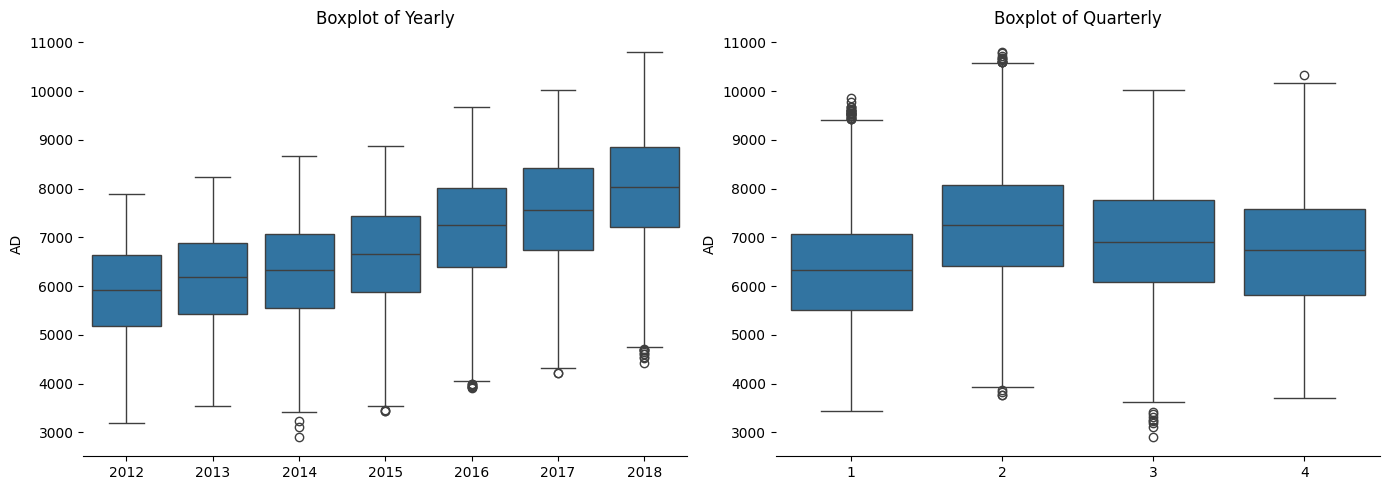

In [42]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot( x='year', y = 'AD', data=df)
plt.xlabel('')
plt.title ('Boxplot of Yearly')
sns.despine(left = True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot( x='quarter', y = 'AD', data=df)
plt.xlabel('')
plt.title ('Boxplot of Quarterly')
sns.despine(left = True)
plt.tight_layout()


Text(0.5, 1.0, 'Distribution')

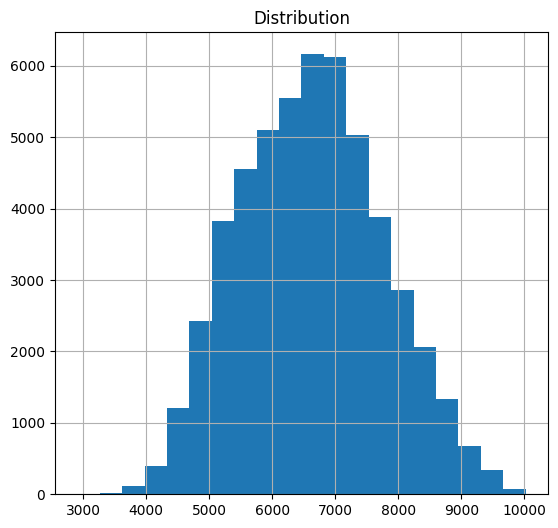

In [30]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
df['AD'].hist(bins = 20)
plt.title('Distribution')

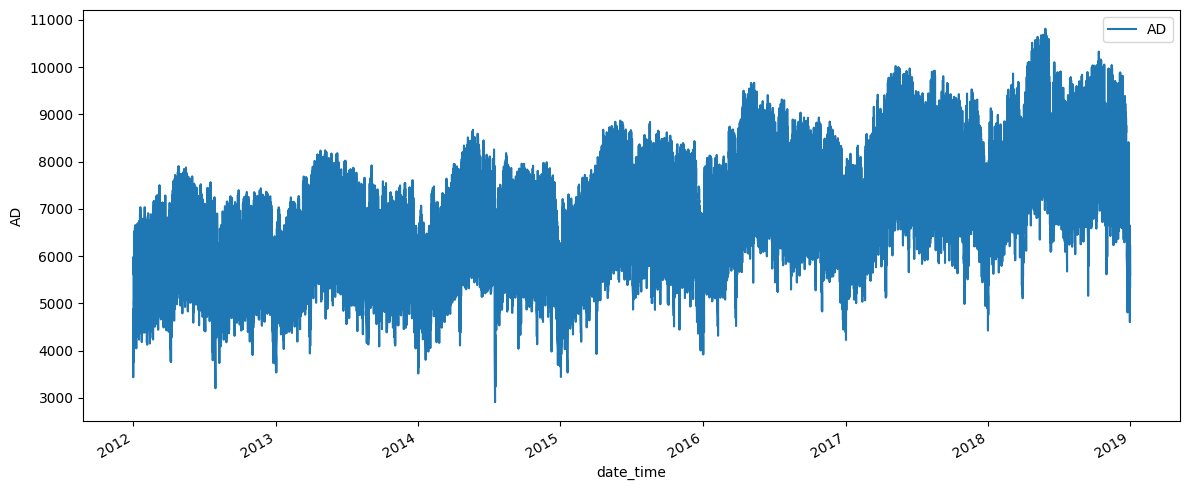

In [43]:
df1 = df.loc[:,['date_time', 'AD']]
df1.set_index('date_time', inplace = True)
df1.plot(figsize = (12,5))
plt.ylabel('AD')
plt.tight_layout()
plt.title('')
plt.show()

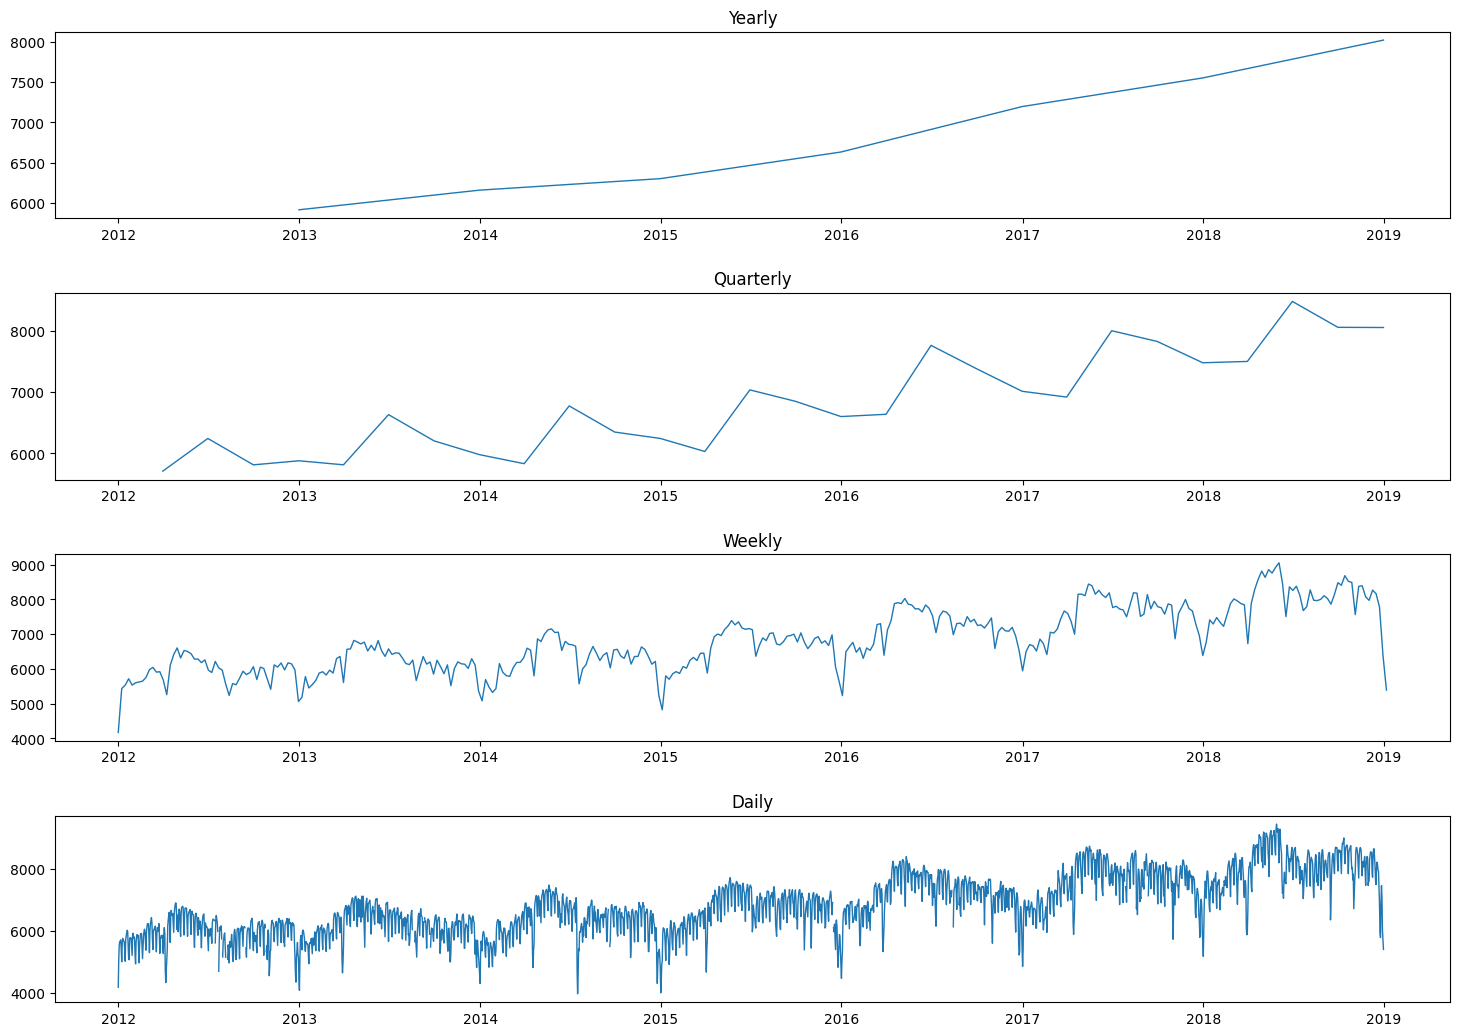

In [44]:
import matplotlib.ticker as tkr
fig = plt.figure(figsize = (18,16))
fig.subplots_adjust(hspace = .4)
fig1 = fig.add_subplot(5,1,1)
fig1.plot(df1['AD'].resample('YE').mean(), linewidth = 1)
fig1.set_title('Yearly')
fig1.tick_params(axis = 'both', which = 'major')

fig2 = fig.add_subplot(5,1,2, sharex = fig1)
fig2.plot(df1['AD'].resample('QE').mean(), linewidth = 1)
fig2.set_title('Quarterly')
fig2.tick_params(axis = 'both', which = 'major')

fig3 = fig.add_subplot(5,1,3, sharex = fig1)
fig3.plot(df1['AD'].resample('W').mean(), linewidth = 1)
fig3.set_title('Weekly')
fig3.tick_params(axis = 'both', which = 'major')

fig4 = fig.add_subplot(5,1,4, sharex = fig1)
fig4.plot(df1['AD'].resample('D').mean(), linewidth = 1)
fig4.set_title('Daily')
fig4.tick_params(axis = 'both', which = 'major')